In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
# The goal of this project is to predict one's loan status based on relevant
# hyperparameters

In [9]:
# Data Cleaning for the training set
# replace missing values and adjust them accordingily

In [10]:
# Check for missing values
# make a chart to see how many values from each column are missing
total = df_train.isnull().sum().sort_values(ascending=False)
total

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [11]:
df_train['Credit_History'].isnull().sum()

50

In [12]:
df_train['Credit_History'].isnull().count()

614

In [13]:
df_train.isnull().count()

Loan_ID              614
Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     614
Credit_History       614
Property_Area        614
Loan_Status          614
dtype: int64

In [14]:
type(total)

pandas.core.series.Series

In [15]:
var_type = df_train.dtypes
var_type

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
# find the percentage
# isnull().sum() returns the sum of every column where false = 0 and true = 1
# isnull().count() returns the number of rows regardless if there are null values in them
# axis=1 is for columns, axis=0 is for rows positioning
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
perc_missing_data = pd.concat([total, percent, var_type], axis=1, keys=['Total Missing', 'Perc Missing', 'Type'])
print(perc_missing_data)

                   Total Missing  Perc Missing     Type
Credit_History                50      0.081433  float64
Self_Employed                 32      0.052117   object
LoanAmount                    22      0.035831  float64
Dependents                    15      0.024430   object
Loan_Amount_Term              14      0.022801  float64
Gender                        13      0.021173   object
Married                        3      0.004886   object
Loan_Status                    0      0.000000   object
Property_Area                  0      0.000000   object
CoapplicantIncome              0      0.000000  float64
ApplicantIncome                0      0.000000    int64
Education                      0      0.000000   object
Loan_ID                        0      0.000000   object


In [17]:
# Fill in appropriate null values
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].dropna().mode().values[0])
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].dropna().mode().values[0])
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].dropna().mode().values[0])
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].dropna().mode().values[0])
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].dropna().median() )
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].dropna().mode().values[0])
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].dropna().mode().values[0])

In [18]:
# double check that there are no more missing values
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
# Data Visualization
# Goal: Determine which factors impact loan status
# gender, married, applicant income
# education, self-employed
# credit history
# property area 
# etc.

<AxesSubplot:xlabel='Gender', ylabel='count'>

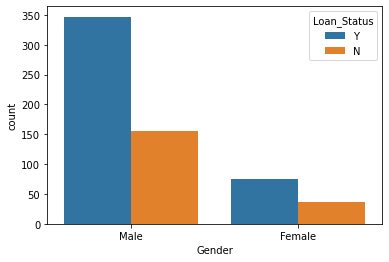

In [20]:
# utilize a countplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Gender', hue='Loan_Status', data=df_train)

<AxesSubplot:xlabel='Married', ylabel='count'>

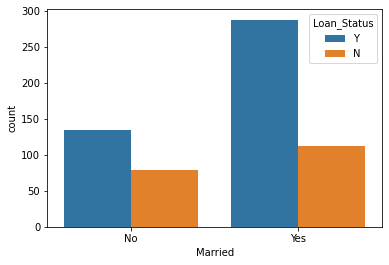

In [21]:
sns.countplot(x='Married', hue='Loan_Status', data=df_train)

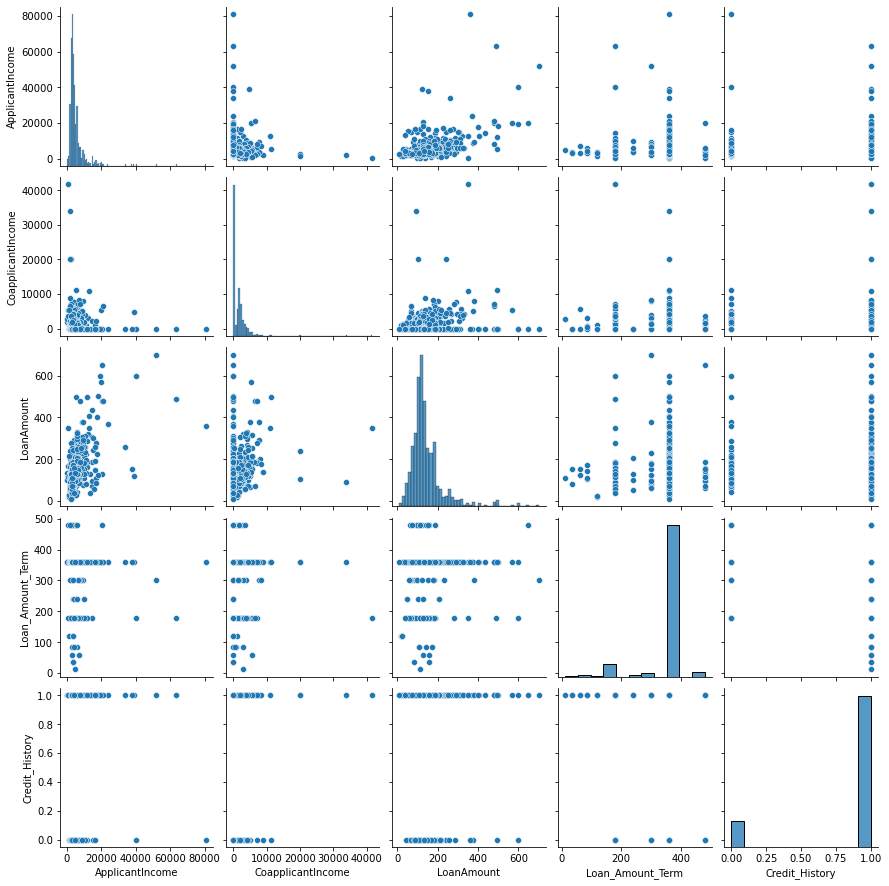

In [22]:
# check correlation for all numeric data
sns.pairplot(data=df_train)

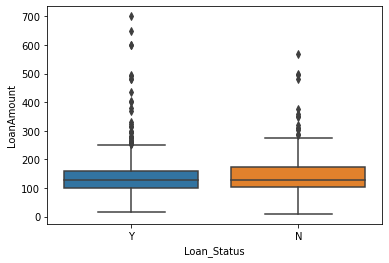

In [23]:
sns.boxplot(x = 'Loan_Status', y = 'LoanAmount', data = df_train)
plt.show()

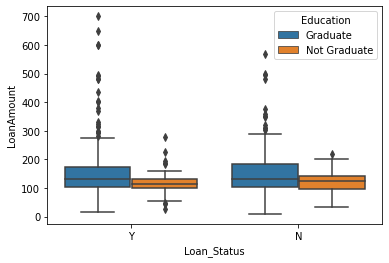

In [24]:
sns.boxplot(x = 'Loan_Status', y = 'LoanAmount', hue='Education', data = df_train)
plt.show()

<AxesSubplot:xlabel='Dependents', ylabel='count'>

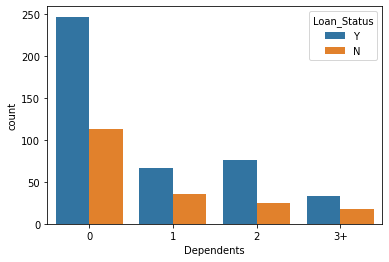

In [25]:
sns.countplot(x='Dependents', hue='Loan_Status', data=df_train)

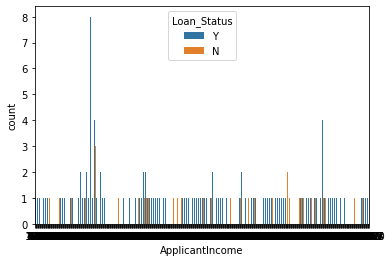

In [26]:
sns.countplot(x='ApplicantIncome', hue='Loan_Status', data=df_train)
plt.show()

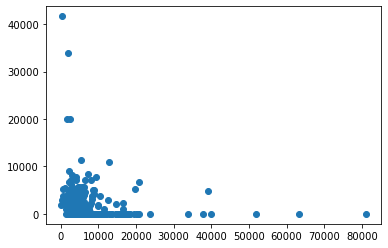

In [27]:
plt.scatter(df_train['ApplicantIncome'], df_train['CoapplicantIncome'])

In [28]:
# all these factors (except for loan ID) are important 
df_train.drop('Loan_ID', axis=1, inplace=True)
# we will show the correlation using a heatmap for all the data

In [29]:
# encoding to numeric data
# take every single categoric data and convert to numeric
df_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [30]:
df_train[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [31]:
code_num = {'Male': 1, 'Female': 2, 'Yes': 1, 'No': 2, 'Graduate' : 1, 'Not Graduate': 2, 'Urban': 3, 'Semiurban': 2, 'Rural': 1, 'Y': 1, 'N': 0, '3+': 3}
df_train = df_train.applymap(lambda x: code_num.get(x) if x in code_num else x)
df_test = df_test.applymap(lambda x: code_num.get(x) if x in code_num else x)

In [32]:
# check that all types are numeric
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,0,1,2,5849,0.0,128.0,360.0,1.0,3,1
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1


In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


In [34]:
# we see that dependets is stil an object 
Dependents_ = pd.to_numeric(df_train.Dependents)
Dependents__ = pd.to_numeric(df_test.Dependents)
df_train.drop(['Dependents'], axis = 1, inplace = True)
df_test.drop(['Dependents'], axis = 1, inplace = True)
df_train = pd.concat([df_train, Dependents_], axis = 1)
df_test = pd.concat([df_test, Dependents__], axis = 1)

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


<AxesSubplot:>

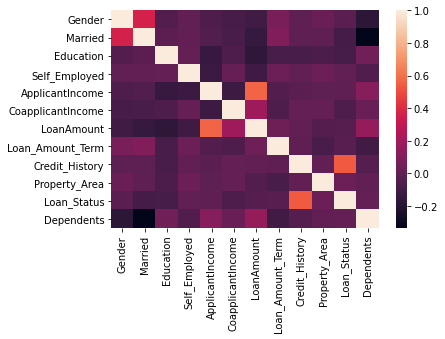

In [36]:
# heatmap to see correlation of all variables
cor = df_train.corr()
sns.heatmap(cor)

In [37]:
# Model Building
# Logistic Regression
# Decision Tree Classifier
# Random Forest Classifier

y = df_train['Loan_Status']
X = df_train.drop('Loan_Status', axis = 1)

from sklearn.model_selection import train_test_split


In [38]:
# split data for validation set to get accuracy scores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
y_pred_log

C:\Users\16477\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [41]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier_tree.fit(X_train, y_train)

y_pred_tree = classifier_tree.predict(X_test)
y_pred_tree

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [42]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier_forest = RandomForestClassifier(n_estimators=100)
classifier_forest.fit(X_train, y_train)

y_pred_forest = classifier_tree.predict(X_test)
y_pred_forest

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

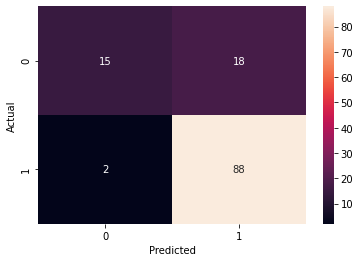

In [43]:
# Confusion matrix for each of the machine learning models
# Logistic Regression
# cross tab makes a table
cm_log = pd.crosstab(y_test, y_pred_log, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm_log, annot=True)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

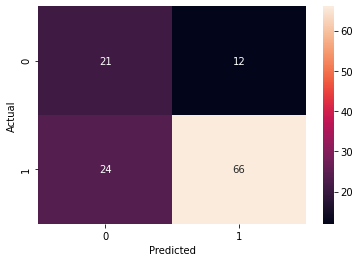

In [44]:
# Confusion matrix for Random Tree Classifier
cm_tree = pd.crosstab(y_test, y_pred_tree, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm_tree, annot=True)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

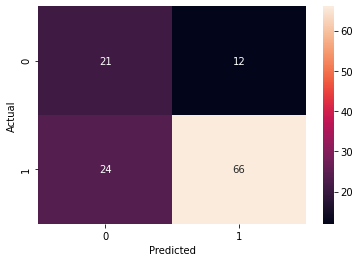

In [45]:
# Random Forest Classifier
cm_forest = pd.crosstab(y_test, y_pred_forest, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm_forest, annot=True)

In [47]:
# evaluation for accuracy of model
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

acc_log = accuracy_score(y_test, y_pred_log)
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_forest = accuracy_score(y_test, y_pred_forest)

rec_log = recall_score(y_test, y_pred_log)
rec_tree = recall_score(y_test, y_pred_tree)
rec_forest = recall_score(y_test, y_pred_forest)

prec_log = precision_score(y_test, y_pred_log)
prec_tree = precision_score(y_test, y_pred_tree)
prec_forest = precision_score(y_test, y_pred_forest)

f1_log = f1_score(y_test, y_pred_log)
f1_tree = f1_score(y_test, y_pred_tree)
f1_forest = f1_score(y_test, y_pred_forest)     

# make series then table from there

In [51]:
# Summary Table of Metrics
from astropy.table import QTable, Table, Column

metrics_table = Table()
metrics_table['log_metrics'] = [acc_log, prec_log, rec_log, f1_log]
metrics_table['tree_metrics'] = [acc_tree, prec_tree, rec_tree, f1_tree]
metrics_table['forest_metrics'] = [acc_forest, prec_forest, rec_forest, f1_forest]
metrics_table

log_metrics,tree_metrics,forest_metrics
float64,float64,float64
0.8373983739837398,0.7073170731707317,0.7073170731707317
0.8301886792452831,0.8461538461538461,0.8461538461538461
0.9777777777777777,0.7333333333333333,0.7333333333333333
0.8979591836734695,0.7857142857142856,0.7857142857142856


In [55]:
# From these metrics, it looks like logistic regression has the highest accuracy across all metrics
# we will use logistic regression on the test set